In [1]:
import pandas as pd

In [2]:
import numpy as np

In [4]:
import csv
with open("/home/hweem/git/mastersdegree/ytcrawl/customs/scopus/scopus_videos_2014_comp.csv", newline='') as f:
    table = list(csv.reader(f))
print(table)

[['1', '0.1309717046', '0.1020746357', '0.1167669872', '0.0886449913'], ['0.1309717046', '1', '0.9480702048', '0.2664622295', '0.700071996'], ['0.1020746357', '0.9480702048', '1', '0.2432101279', '0.8206870868'], ['0.1167669872', '0.2664622295', '0.2432101279', '1', '0.5802031707'], ['0.0886449913', '0.700071996', '0.8206870868', '0.5802031707', '1']]


In [5]:
data_raw = pd.DataFrame(table)

In [120]:
data_raw1 = pd.read_csv("/home/hweem/git/mastersdegree/ytcrawl/customs/scopus/scopus_videos_2014_comp.csv", header=0)
data_raw2 = pd.read_csv("/home/hweem/git/mastersdegree/ytcrawl/customs/scopus/scopus_videos_2019_comp.csv", header=0)

In [122]:
data_raw = pd.concat([data_raw1, data_raw2], sort=False)
data_raw

,idx,videoId,content,video_visual,paper_visual,audio_style,idx_paper,q,title,description,...,channelId,duration,viewCount,likeCount,dislikeCount,commentCount,favoriteCount,liveStreaming,queriedAt,purpose
0,18,5QSv0EQ8qdw,paper_application,creative,creative,no_voice,10.1021/ct4010307,10.1021/ct4010307,Membrane self assembly in 200ns,Composition of the simulation box:\n134 POPE l...,...,UCObM3HwX-KGSuyU8Kdk3sIA,14,49,0.0,0.0,0.0,0,0,2020-07-20 13:49:18,NaN
1,24,ouGtd8nhm6Y,paper_assessment,presentation,presentation,narrative,10.1371/journal.pcbi.1003496,"10.1371/journal.pcbi.1003496, journals.plos.or...",PERFIS profissionais em BIOINFORMTICA | Que ti...,"Nesse vdeo, apresento os resultados de uma pes...",...,UCVA_0n8hMH0yGj8MAiLtZVw,816,547,97.0,0.0,14.0,0,0,2020-07-21 18:40:52,NaN
2,25,xRuZDG0QgH8,paper_assessment,presentation,presentation,narrative,10.1371/journal.pcbi.1003496,"10.1371/journal.pcbi.1003496, journals.plos.or...",Quer COMEAR em BIOINFORMTICA | Quais as COMPET...,"Nesse vdeo, apresentamos os resultados de um a...",...,UCVA_0n8hMH0yGj8MAiLtZVw,708,794,106.0,0.0,4.0,0,1,2020-07-21 18:40:52,NaN
3,104,8AP6YQrwaN0,paper_assessment,raw,raw,dialogue,10.1371/journal.pcbi.1003588,"10.1371/journal.pcbi.1003588, journals.plos.or...",Consciousness Live! Discussion with Hakwan Lau...,Masafumi's website: https://sites.google.com/s...,...,UCPrf3v-1gJS-v-yhrmzOVpw,7530,557,9.0,0.0,0.0,0,1,2020-07-24 10:00:01,NaN
4,1,Qbrw8SmL2Nk,paper_explanation,presentation,presentation,narrative,10.1016/j.cviu.2013.10.003,10.1016/j.cviu.2013.10.003,Adaptive Estimation of Visual Smoke Detection ...,Full text available on ScienceDirect: http://d...,...,UCsXGd4MWlLwPiDEcy0gEJQQ,315,38,2.0,0.0,0.0,0,0,2020-07-20 13:40:53,NaN
5,4,CBgf0X_v5YI,paper_explanation,presentation,presentation,narrative,10.1016/j.knosys.2013.12.005,10.1016/j.knosys.2013.12.005,missing values in a dataset - how to impute them,"A/Prof Zahid Islam of CSU, Australia describes...",...,UCrcz90CHdK6GrtnMvk_vVXA,902,140,0.0,0.0,0.0,0,0,2020-07-20 13:40:53,NaN
6,10,iMHyH9a8z8E,paper_explanation,presentation,presentation,narrative,10.1016/j.cviu.2013.09.007,10.1016/j.cviu.2013.09.007,Object Tracking Using Learned Feature Manifolds,Full text available on ScienceDirect: http://d...,...,UCsXGd4MWlLwPiDEcy0gEJQQ,217,102,0.0,0.0,0.0,0,0,2020-07-20 13:40:53,NaN
7,12,q2j53m65DKU,paper_explanation,presentation,presentation,narrative,10.1177/0278364913506757,10.1177/0278364913506757,Pancake flipping via trajectory optimization,"In this video, we describe our approach to usi...",...,UCZVok0u5wpzTFPeUh_Z3IIw,181,155,7.0,0.0,2.0,0,0,2020-07-20 13:40:53,NaN
8,20,z8jhbqtFXY0,paper_explanation,presentation,presentation,narrative,10.1016/j.patcog.2013.08.011,10.1016/j.patcog.2013.08.011,Coarse Classifier Construction from a Large Nu...,A Robust Method for Coarse Classifier Construc...,...,UCsXGd4MWlLwPiDEcy0gEJQQ,285,21,0.0,0.0,0.0,0,0,2020-07-20 13:49:18,NaN
9,74,YMVhYD9MYqs,paper_explanation,presentation,presentation,narrative,10.1016/j.knosys.2014.01.003,10.1016/j.knosys.2014.01.003,Adaptive and Online Data Anomaly Detection for...,Full text on ScienceDirect: http://dx.doi.org/...,...,UCsXGd4MWlLwPiDEcy0gEJQQ,293,113,1.0,0.0,0.0,0,0,2020-07-23 02:48:17,NaN


Drop na

In [124]:
print(data_raw.columns[16:21])
data_dropna = data_raw.dropna(subset=data_raw.columns[16:21])
print(len(data_dropna), len(data_raw))

Index(['duration', 'viewCount', 'likeCount', 'dislikeCount', 'commentCount'], dtype='object')
207 223


In [125]:
data_dropna[data_raw.columns[16:21]].isnull().any()

duration        False
viewCount       False
likeCount       False
dislikeCount    False
commentCount    False
dtype: bool

Select ~3 quartiles by viewCount

In [126]:
q3_viewcount = data_raw["viewCount"].quantile(q=0.25)

In [141]:
data_filtered = data_dropna[data_dropna["viewCount"] > q3_viewcount]
# data_filtered = data_dropna[data_dropna["viewCount"] > 1000]

In [142]:
q3_viewcount, len(data_filtered), len(data_raw)

(32.5, 152, 223)

In [21]:
from scipy import stats

In [22]:
stats.pearsonr(data_filtered["duration"], data_filtered["viewCount"])

(0.10361602321750081, 0.3229637052317512)

In [143]:
corr_pearson = np.zeros((5,5))
p_pearson = np.zeros((5,5))
for i in range(16,21):
    for j in range(16,21):
        corr_pearson[i-16][j-16], p_pearson[i-16][j-16] = stats.pearsonr(data_filtered[data_filtered.columns[i]], data_filtered[data_filtered.columns[j]])

In [144]:
corr_pearson

array([[1.        , 0.04416723, 0.0233059 , 0.05091755, 0.02947272],
       [0.04416723, 1.        , 0.92096523, 0.26851232, 0.70394002],
       [0.0233059 , 0.92096523, 1.        , 0.23576441, 0.78996076],
       [0.05091755, 0.26851232, 0.23576441, 1.        , 0.58112456],
       [0.02947272, 0.70394002, 0.78996076, 0.58112456, 1.        ]])

In [25]:
from matplotlib import pyplot as plt

In [26]:
%matplotlib inline

In [96]:
def heatmap_from_csv(fpath=None, arr=None, title=None, cols=['Duration', '#View', '#Like', '#Dislike', '#Comment']):
    # Values must be already calculated on csv.

    # with open(fpath, newline='') as f:
    #     table = list(csv.reader(f))
    # print(table)

    if fpath != None:
        intersection_matrix = np.genfromtxt(fpath, delimiter=',')
    elif type(arr) != type(None):
        intersection_matrix = arr

    print(intersection_matrix)
    intersection_matrix = np.round(intersection_matrix, 2)

    fig, ax = plt.subplots()

    if title != None:
        ax.set_title(title)

    ax.matshow(intersection_matrix, cmap=plt.cm.coolwarm, vmin=-1.0, vmax=1.0)

    x_pos = np.arange(len(cols))
    plt.xticks(x_pos, cols)
    y_pos = np.arange(len(cols))
    plt.yticks(y_pos, cols)

    for i in range(len(cols)):
        for j in range(len(cols)):
            c = intersection_matrix[j, i]
            ax.text(i, j, str(c), va='center', ha='center')

    # plt.clim(-1, 1)
    plt.show()

[[1.         0.04416723 0.0233059  0.05091755 0.02947272]
 [0.04416723 1.         0.92096523 0.26851232 0.70394002]
 [0.0233059  0.92096523 1.         0.23576441 0.78996076]
 [0.05091755 0.26851232 0.23576441 1.         0.58112456]
 [0.02947272 0.70394002 0.78996076 0.58112456 1.        ]]


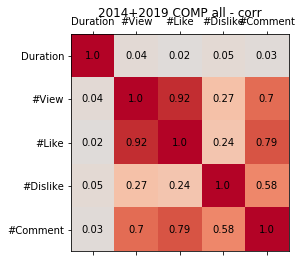

[[0.00000000e+00 5.88990968e-01 7.75643178e-01 5.33300366e-01
  7.18515961e-01]
 [5.88990968e-01 0.00000000e+00 2.81024952e-63 8.23549078e-04
  4.73504005e-24]
 [7.75643178e-01 2.81024952e-63 0.00000000e+00 3.45521178e-03
  1.12113101e-33]
 [5.33300366e-01 8.23549078e-04 3.45521178e-03 0.00000000e+00
  4.19072815e-15]
 [7.18515961e-01 4.73504005e-24 1.12113101e-33 4.19072815e-15
  0.00000000e+00]]


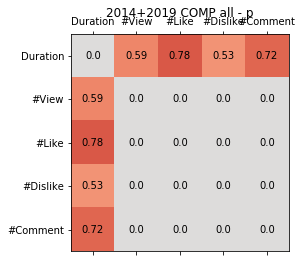

In [145]:
# 2014+2019 comp all
heatmap_from_csv(arr=corr_pearson, title="2014+2019 COMP all - corr")
heatmap_from_csv(arr=p_pearson, title="2014+2019 COMP all - p")

In [146]:
# 2014 comp explanation/assessment/application
data_filtered_hq = data_filtered[data_filtered["content"].isin(["paper_explanation", "paper_assessment", "paper_application"])]

In [147]:
len(data_filtered_hq), len(data_filtered)

(24, 152)

In [150]:
corr_pearson = np.zeros((5,5))
p_pearson = np.zeros((5,5))
for i in range(16,21):
    for j in range(16,21):
        corr_pearson[i-16][j-16], p_pearson[i-16][j-16] = stats.pearsonr(data_filtered_hq[data_filtered_hq.columns[i]], data_filtered_hq[data_filtered_hq.columns[j]])

[[ 1.         -0.01105852 -0.01208741 -0.01250313 -0.06227905]
 [-0.01105852  1.          0.9999439   0.99998962  0.08608216]
 [-0.01208741  0.9999439   1.          0.9999236   0.09356535]
 [-0.01250313  0.99998962  0.9999236   1.          0.08533194]
 [-0.06227905  0.08608216  0.09356535  0.08533194  1.        ]]


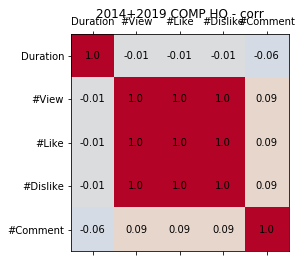

[[0.00000000e+000 9.59098610e-001 9.55296677e-001 9.53760784e-001
  7.72507303e-001]
 [9.59098610e-001 0.00000000e+000 5.95937027e-045 5.20030024e-053
  6.89196409e-001]
 [9.55296677e-001 5.95937027e-045 0.00000000e+000 1.78364404e-043
  6.63663218e-001]
 [9.53760784e-001 5.20030024e-053 1.78364404e-043 4.56349560e-167
  6.91775001e-001]
 [7.72507303e-001 6.89196409e-001 6.63663218e-001 6.91775001e-001
  0.00000000e+000]]


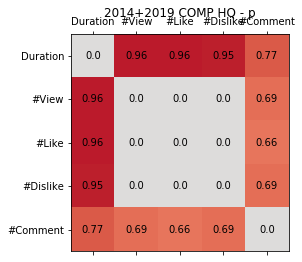

In [151]:
# 2014 comp exp/ass/app
heatmap_from_csv(arr=corr_pearson, title="2014+2019 COMP HQ - corr")
heatmap_from_csv(arr=p_pearson, title="2014+2019 COMP HQ - p")

In [160]:
# Logarithm
# Drop dislike == 0 | comment == 0

data_nonzero = data_filtered[~(data_filtered[data_filtered.columns[19:21]].T == 0.0).any()]
data_nonzero[data_nonzero.columns[16:21]] = np.log10(data_nonzero[data_nonzero.columns[16:21]])
print(data_nonzero[data_nonzero.columns[16:21]])

# data_nonzero = data_filtered[~(data_filtered[data_filtered.columns[18:20]].T == 0.0).any()]
# data_nonzero[data_nonzero.columns[16:20]] = np.log10(data_nonzero[data_nonzero.columns[16:20]])
# print(data_nonzero[data_nonzero.columns[16:20]])

print(len(data_nonzero))
# data_nonzero
# data_filtered

     duration  viewCount  likeCount  dislikeCount  commentCount
13   2.247973   2.445604   1.397940      0.000000      0.301030
15   3.105169   5.697834   4.055302      2.416641      0.477121
24   2.025306   2.437751   0.602060      0.000000      0.000000
33   3.049606   3.542078   2.130334      0.698970      1.903090
36   2.698101   3.219323   2.103804      0.301030      1.662758
37   3.435685   3.752356   2.328380      1.322219      1.690196
38   3.412629   5.530684   3.813114      2.567026      2.445604
39   2.866287   5.793468   4.495988      2.994317      3.872215
40   2.876795   5.604527   4.135482      2.698101      3.187521
42   3.153510   6.023345   4.429155      3.125156      3.417970
43   3.060320   5.847492   4.493249      2.952792      3.564548
52   2.178977   4.484997   1.897627      0.954243      1.176091
55   2.880242   4.839623   3.656960      1.380211      2.477121
59   3.234517   4.988956   3.354493      3.921426      3.617000
82   2.718502   4.481414   3.454692     

In [161]:
corr_pearson = np.zeros((5,5))
p_pearson = np.zeros((5,5))
for i in range(16,21):
    for j in range(16,21):
        corr_pearson[i-16][j-16], p_pearson[i-16][j-16] = stats.pearsonr(data_nonzero[data_nonzero.columns[i]], data_nonzero[data_nonzero.columns[j]])

# corr_pearson = np.zeros((3,3))
# p_pearson = np.zeros((3,3))
# for i in range(16,18):
#     for j in range(16,18):
#         corr_pearson[i-16][j-16], p_pearson[i-16][j-16] = stats.pearsonr(data_nonzero[data_nonzero.columns[i]], data_nonzero[data_nonzero.columns[j]])

[[1.         0.29105145 0.35073512 0.40691948 0.39342522]
 [0.29105145 1.         0.93538012 0.91099817 0.7639052 ]
 [0.35073512 0.93538012 1.         0.88965729 0.84339172]
 [0.40691948 0.91099817 0.88965729 1.         0.8343312 ]
 [0.39342522 0.7639052  0.84339172 0.8343312  1.        ]]


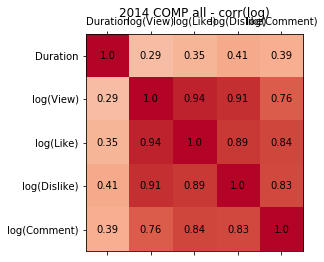

[[0.00000000e+00 1.18661413e-01 5.73946064e-02 2.56374437e-02
  3.14834542e-02]
 [1.18661413e-01 0.00000000e+00 3.64168833e-14 2.76232311e-12
  9.02597468e-07]
 [5.73946064e-02 3.64168833e-14 0.00000000e+00 4.88985451e-11
  4.88434352e-09]
 [2.56374437e-02 2.76232311e-12 4.88985451e-11 0.00000000e+00
  1.01177793e-08]
 [3.14834542e-02 9.02597468e-07 4.88434352e-09 1.01177793e-08
  0.00000000e+00]]


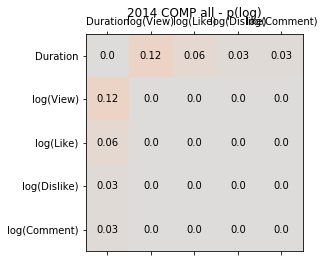

In [162]:
heatmap_from_csv(arr=corr_pearson, title="2014 COMP all - corr(log)", cols=["Duration", "log(View)", "log(Like)", "log(Dislike)", "log(Comment)"])
heatmap_from_csv(arr=p_pearson, title="2014 COMP all - p(log)", cols=["Duration", "log(View)", "log(Like)", "log(Dislike)", "log(Comment)"])

HQ 비디오에 대해선?

In [163]:
# Logarithm
# Drop dislike == 0 | comment == 0
data_nonzero_hq = data_filtered_hq[~(data_filtered_hq[data_filtered_hq.columns[19:21]].T == 0.0).any()]
data_nonzero_hq[data_nonzero_hq.columns[16:21]] = np.log10(data_nonzero_hq[data_nonzero_hq.columns[16:21]])
print(data_nonzero_hq[data_nonzero_hq.columns[16:21]])
print(len(data_nonzero_hq))
# data_nonzero_hq
# data_filtered_hq

    duration  viewCount  likeCount  dislikeCount  commentCount
13  2.247973   2.445604   1.397940      0.000000      0.301030
15  3.105169   5.697834   4.055302      2.416641      0.477121
2


샘플이 너무 적군..